In [35]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
#Read the csv file
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
df.drop(columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],inplace=True)

In [10]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


## EDA

In [13]:
df.shape

(517, 12)

In [14]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [16]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

## Encoding

In [19]:
import category_encoders as ce

In [20]:
Ordinal = ce.OrdinalEncoder(cols = ['month','day','size_category'])
Ordinal

OrdinalEncoder(cols=['month', 'day', 'size_category'])

In [21]:
df1 = Ordinal.fit_transform(df)

In [22]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,1,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,2,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,2,3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,1,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,1,4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


## Visualization

<AxesSubplot:xlabel='size_category', ylabel='count'>

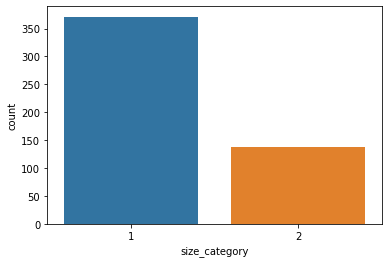

In [23]:
sns.countplot(df1['size_category'])

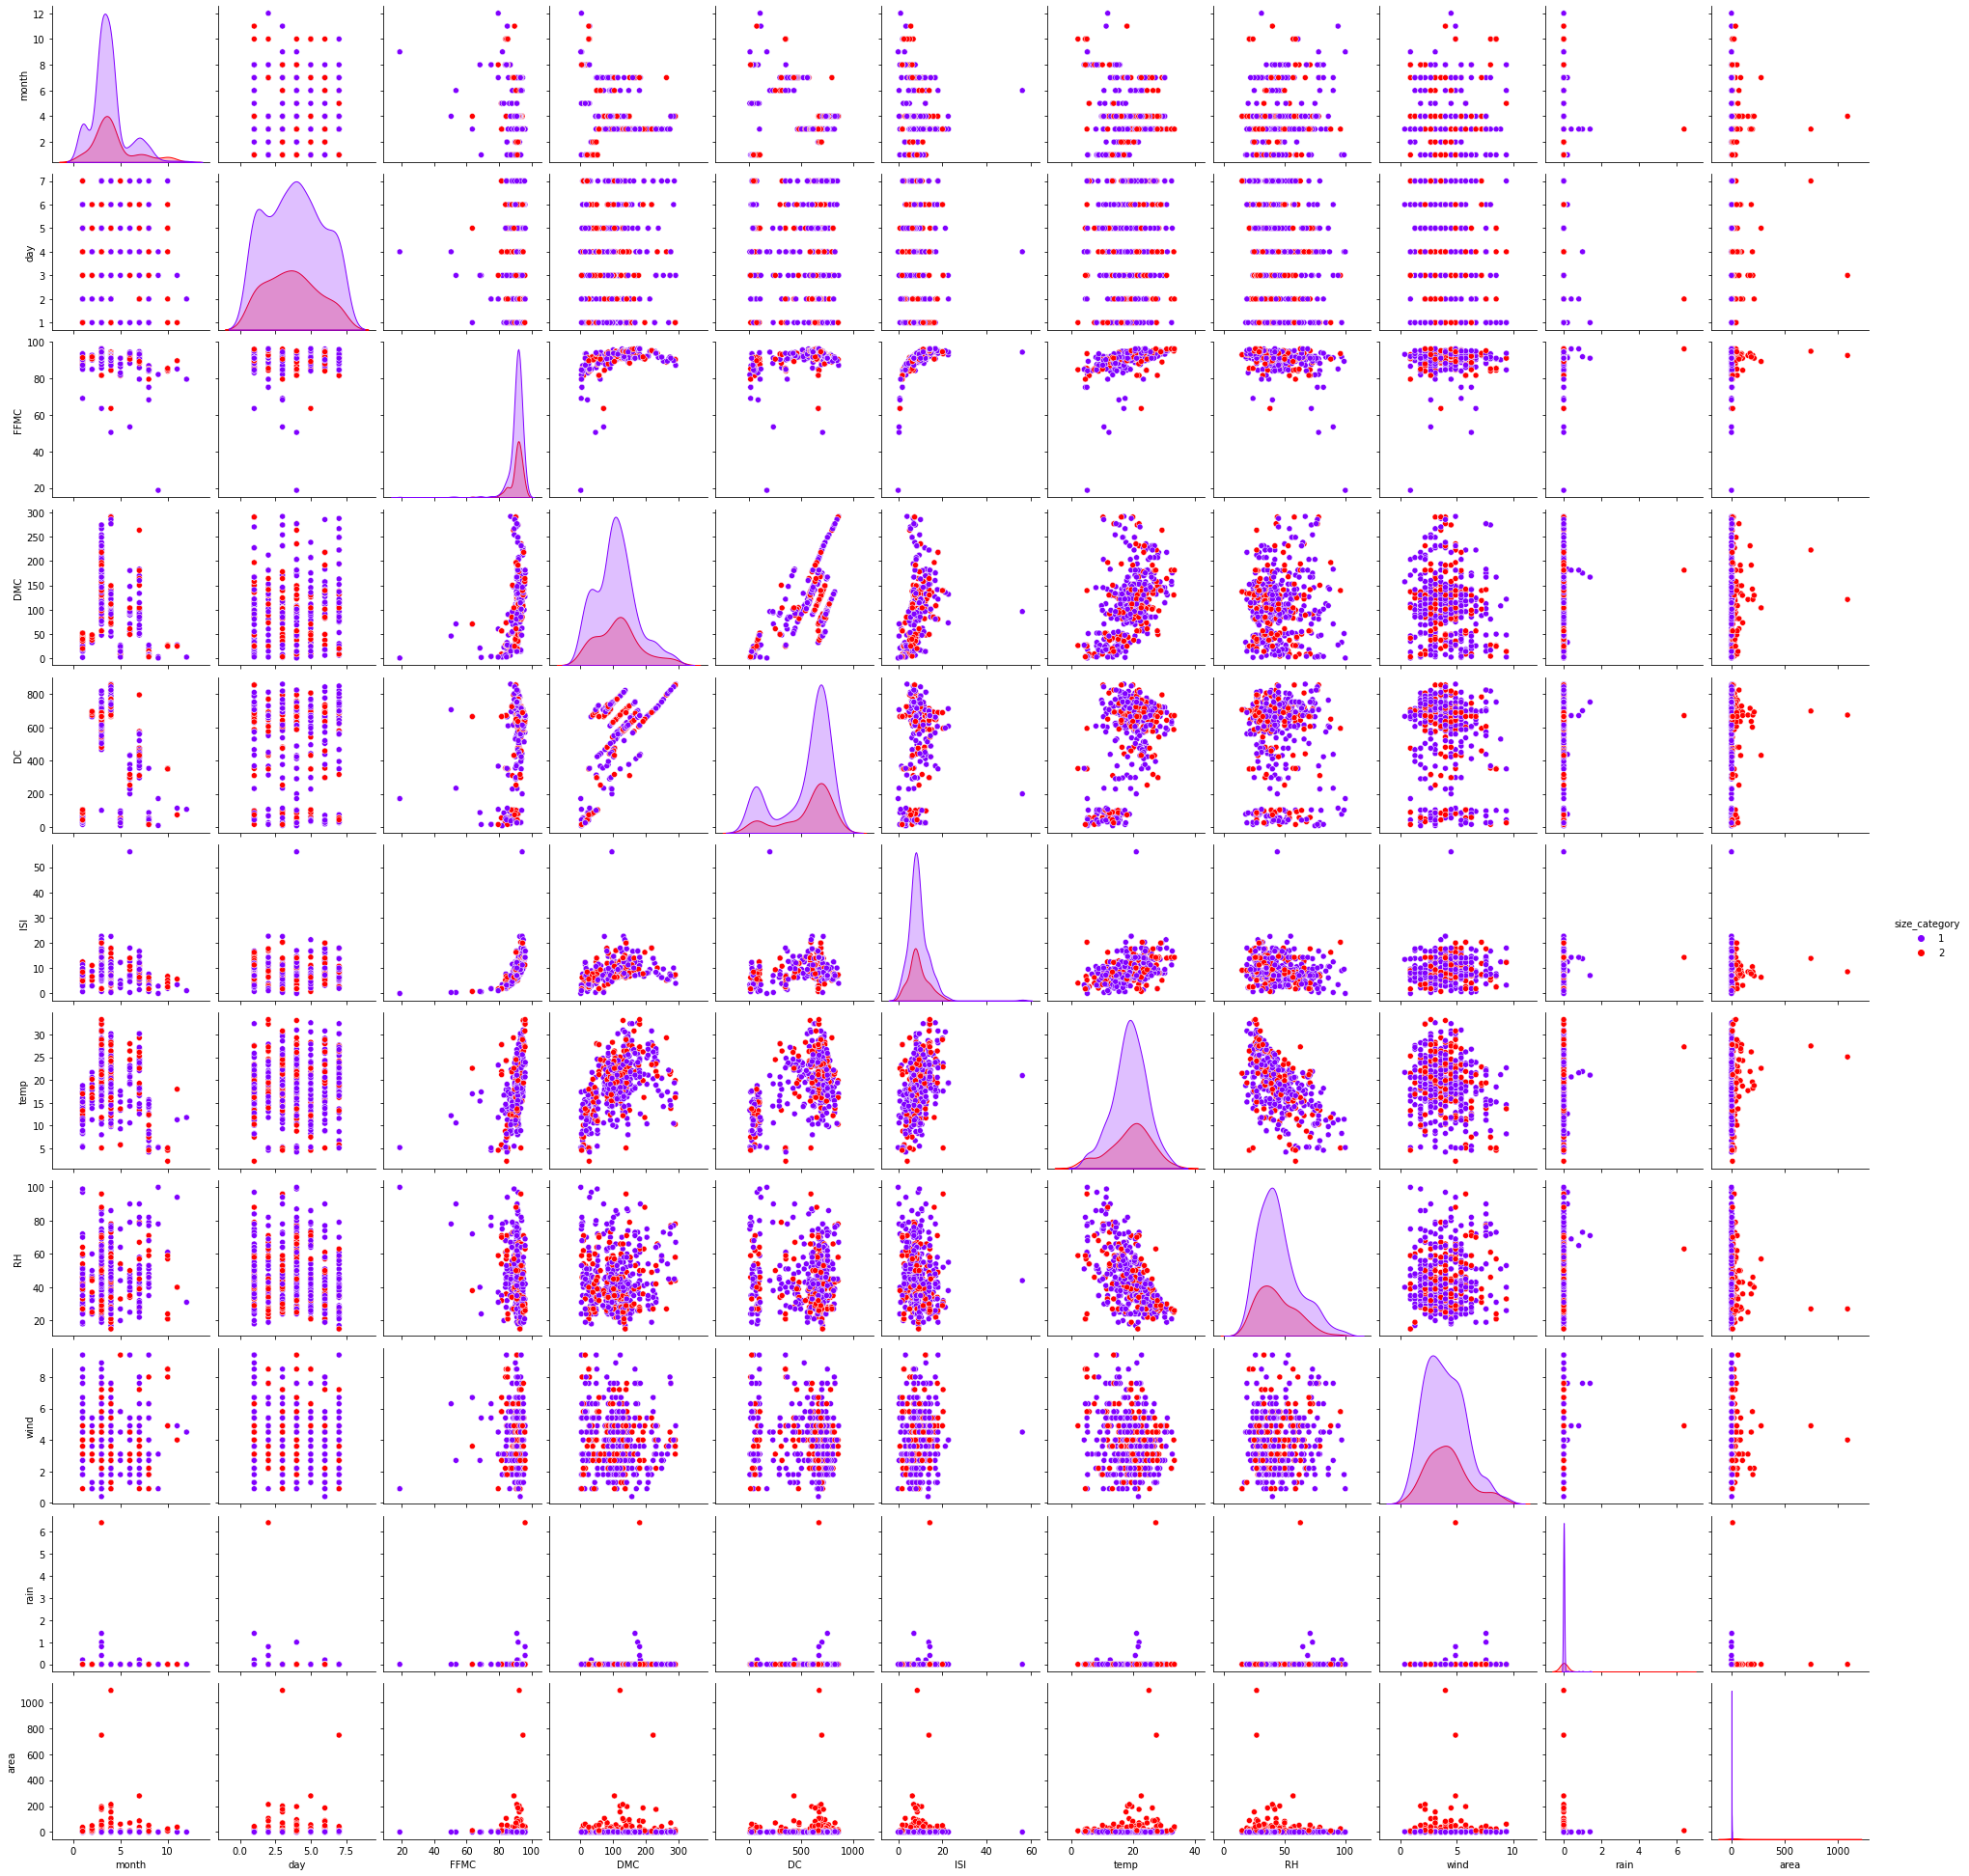

In [24]:
sns.pairplot(df1,hue= 'size_category', palette= 'rainbow')

## Feature Scaling

In [25]:
sc = StandardScaler()

In [27]:
x = df1.iloc[:,:-1]
y = df1['size_category']

In [28]:
x = sc.fit_transform(x)
x

array([[-1.47838730e+00, -1.45853534e+00, -7.96039810e-01, ...,
         1.49437016e+00, -6.90347669e-02, -2.02791345e-01],
       [-9.64033823e-01, -9.39378358e-01, -3.25665522e-03, ...,
        -1.72936355e+00, -6.90347669e-02, -2.02791345e-01],
       [-9.64033823e-01, -4.20221372e-01, -3.25665522e-03, ...,
        -1.50703709e+00, -6.90347669e-02, -2.02791345e-01],
       ...,
       [-4.49680347e-01,  9.89356142e-02, -1.62485856e+00, ...,
         1.49437016e+00, -6.90347669e-02, -2.86077466e-02],
       [-4.49680347e-01, -4.20221372e-01,  6.81419706e-01, ...,
        -6.33346504e-03, -6.90347669e-02, -2.02791345e-01],
       [ 4.17950094e+00, -9.39378358e-01, -2.00323234e+00, ...,
         2.71574613e-01, -6.90347669e-02, -2.02791345e-01]])

## Splitting the data

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

## Model Building

In [30]:
svc = SVC(kernel= 'poly')
svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.8034398034398035
0.7352941176470589


* Based on the above data, we can coclude that the model is overfitting

## Hyper Parameter Tuning

In [31]:
svc = SVC()

param = {
    
    'C': [0.1,0.001,0.0001,10],
    'kernel': ['linear','rbf','poly'],
    'gamma': [0.1,0.001,1]
}

In [32]:
grid = GridSearchCV(SVC(), param_grid= param)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 10],
                         'gamma': [0.1, 0.001, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [33]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [34]:
svc = SVC(kernel= 'linear',gamma=0.1,C=10)
svc.fit(xtrain,ytrain)

ypred = svc.predict(xtest)

print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.9852579852579852
0.9705882352941176
